In [1]:
import os
import pandas as pd
import numpy as np
import seaborn_image as isns
from pathlib import Path
import imageio
from PIL import Image
import cv2
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import random
import seaborn as sb
import pprint
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
import imagehash
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn import tree
from sklearn import metrics

plt.rcParams['figure.figsize'] = [2.0, 2.0]
plt.rcParams['figure.dpi'] = 80
plt.style.use('ggplot')
plt.rcParams["axes.grid"] = False



In [2]:
files = []

for dirname, _, filenames in os.walk('./2750'):
    for filename in filenames:
        if ".jpg" in filename:
            name = "" + os.path.join(dirname, filename)
            files.append(name)
            #print(name)


print(files[0])
print(len(files))
            



./2750\AnnualCrop\AnnualCrop_1.jpg
27000


In [3]:
raw_images = np.zeros([len(files),64, 64, 3])
io_img = list()
cv_img = []

print(len(raw_images))
print(type(raw_images))

27000
<class 'numpy.ndarray'>


Loading completed
AxesImage(20,20;124x120.8)


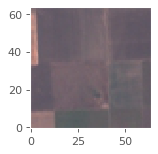

In [4]:
i=0
for img in files:
    #raw_images[i] = np.asarray(Image.open(Path(img))).astype('uint8')
    raw_images[i] = np.asarray(Image.open(Path(img))).astype('uint8')/255
    io_img.append(imageio.imread(Path(img)))
    cv_img.append(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))
    i = i+1
    #raw_images[i].show()

#print(raw_images[1])
print('Loading completed')
print(plt.imshow(io_img[0]))

In [5]:
labels = np.empty(len(files), dtype = 'S50')

i = 0
for label in files:
#    labels[i] = label.split('/')[2] #Mac
    labels[i] = label.split('\\')[1] #Windows
    i += 1

print(labels)

[b'AnnualCrop' b'AnnualCrop' b'AnnualCrop' ... b'SeaLake' b'SeaLake'
 b'SeaLake']


In [6]:
label_names, yLabels = np.unique(labels, return_inverse=True)

label_Dict = dict(zip(np.unique(yLabels), label_names))
pprint.pprint(label_Dict)
np.array(np.unique(yLabels, return_counts=True))

{0: b'AnnualCrop',
 1: b'Forest',
 2: b'HerbaceousVegetation',
 3: b'Highway',
 4: b'Industrial',
 5: b'Pasture',
 6: b'PermanentCrop',
 7: b'Residential',
 8: b'River',
 9: b'SeaLake'}


array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9],
       [3000, 3000, 3000, 2500, 2500, 2000, 2500, 3000, 2500, 3000]],
      dtype=int64)

0
b'AnnualCrop'
raw:


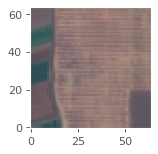

In [7]:
# test labels and images
tmp = 2999
#img = raw_images[tmp]
img = io_img[tmp]

print(yLabels[tmp])
print(label_names[yLabels[tmp]])
print("raw:")
#print(img)
#pplt.imshow(img);
plt.imshow(img.astype('uint8'));


io:
(3,)


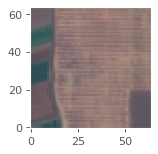

In [8]:
print("io:")
print(raw_images[tmp][1,1,].shape)
plt.imshow(io_img[tmp])
#isns.imgplot(raw_images[tmp], Describe=True)

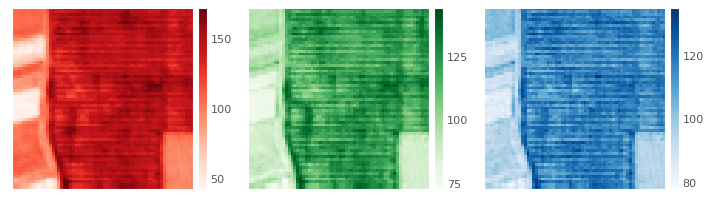

In [9]:
isns.rgbplot(io_img[tmp])

In [10]:
io_img[1].shape


(64, 64, 3)

In [11]:
io_img[1][1,1]

Array([55, 97, 83], dtype=uint8)

In [12]:
raw_images[1][1,1]

array([0.21568627, 0.38039216, 0.3254902 ])

In [13]:
cv_img[1][1,1]

array([55, 97, 83], dtype=uint8)

In [14]:
red1 = np.zeros_like(io_img[tmp])
red1[:,:,0] = io_img[tmp][:,:,0] 
#red1.shape

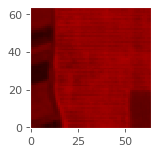

In [15]:
plt.imshow(red1)

In [16]:
green = np.zeros_like(io_img[tmp])
green[:,:,1] = img[:,:,1] 

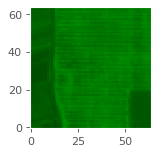

In [17]:
plt.imshow(green)

In [18]:
blue = np.zeros_like(io_img[tmp])
blue[:,:,2] = img[:,:,2] 

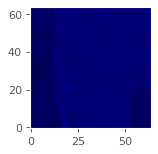

In [19]:
plt.imshow(blue)

In [20]:
def get_channel(pic1, ch):
    ch1 = np.zeros_like(pic1)
    ch1[:,:,ch] = pic1[:,:, ch]
    return ch1

def get_red_channel(pic):
    #red1 = np.zeros_like(pic)
    #red1[:,:,0] = pic[:,:,0]
    return get_channel(pic, 0)

def get_green_channel(pic):
    #green1 = np.zeros_like(pic)
    #green1[:,:,1] = pic[:,:,1]
    return get_channel(pic, 1)

def get_blue_channel(pic):
    #blue1 = np.zeros_like(pic)
    #blue1[:,:,2] = pic[:,:,2]
    return get_channel(pic, 2)

def get_red_channel_only(pic):
    #red1 = np.zeros_like(pic)
    #red1[:,:,0] = pic[:,:,0]
    return get_channel(pic, 0)[:,:,0]

def get_green_channel_only(pic):
    #green1 = np.zeros_like(pic)
    #green1[:,:,1] = pic[:,:,1]
    return get_channel(pic, 1)[:,:,1]

def get_blue_channel_only(pic):
    #blue1 = np.zeros_like(pic)
    #blue1[:,:,2] = pic[:,:,2]
    return get_channel(pic, 2)[:,:,2]

def display_blue(pic):
    #blue1 = np.zeros_like(io[i])
    #blue1[:,:,2] = img[:,:,2]
    blue1 = get_blue_channel(pic)
    plt.imshow(blue1)
    
def display_green(pic):
    #green1 = np.zeros_like(io[i])
    #green1[:,:,1] = img[:,:,1]
    green1 = get_green_channel(pic)
    plt.imshow(green1)
    
def display_red(pic):
    red1 = get_red_channel(pic)
    plt.imshow(red1)

def element_tuple_idx(arr, tpl):
    idx0 = tpl[0]
    idx1 = tpl[1]
    idx2 = tpl[2]
    idx3 = tpl[3]
    return arr[idx0, idx1, idx2, idx3]

def draw_image_with_idx(draw_idx):
    plt.imshow(io_img[draw_idx])
    
def find_max_px_by_channel(pic, ch):
    mx = pic[:,:,ch];
    return mx.max()

def find_min_px_by_channel(pic, ch):
    mn = pic[:,:,ch];
    return mn.min()

def get_max_px_coord_by_channel(pic, ch):
    ch2 = pic[:,:, ch]
    return np.unravel_index(ch2.argmax(), ch2.shape)

def get_min_px_coord_by_channel(pic, ch):
    ch2 = pic[:,:, ch]
    return np.unravel_index(ch2.argmin(), ch2.shape)

def find_max(pic):
    br = pic.sum(axis=2)
    return br.max()

def find_min(pic):
    br = pic.sum(axis=2)
    return br.min()

def get_max_coord(pic):
    br = pic.sum(axis=2)
    return np.unravel_index(br.argmax(), br.shape)

def get_min_coord(pic):
    br = pic.sum(axis=2)
    return np.unravel_index(br.argmin(), br.shape)

def get_sum_channels(pic):
    ch1 = pic[:,:, 0].flatten().sum()
    ch2 = pic[:,:, 1].flatten().sum()
    ch3 = pic[:,:, 2].flatten().sum()
    return ch1, ch2, ch3

def get_mean_channels(pic):
    ch1 = np.around(pic[:,:, 0].flatten().mean(), decimals = 3)
    ch2 = np.around(pic[:,:, 1].flatten().mean(), decimals = 3)
    ch3 = np.around(pic[:,:, 2].flatten().mean(), decimals = 3)
    return ch1, ch2, ch3

def get_median_channels(pic):
    ch1 = np.median(pic[:,:, 0].flatten())
    ch2 = np.median(pic[:,:, 1].flatten())
    ch3 = np.median(pic[:,:, 2].flatten())
    return ch1, ch2, ch3

def get_distance(x, y):
    return distance.euclidean(x, y)

def get_distance_red(pic):
    return get_distance(get_max_px_coord_by_channel(pic, 0), get_min_px_coord_by_channel(pic, 0))

def get_distance_green(pic):
    return get_distance(get_max_px_coord_by_channel(pic, 1), get_min_px_coord_by_channel(pic, 1))

def get_distance_blue(pic):
    return get_distance(get_max_px_coord_by_channel(pic, 2), get_min_px_coord_by_channel(pic, 2))

def get_multy_distance(pic):
    return get_distance(get_max_coord(pic), get_min_coord(pic))

#Luminance (standard for certain colour spaces): (0.2126*R + 0.7152*G + 0.0722*B)
def lum(px):
    return 0.2126*px[0]+0.7152*px[1]+0.0722*px[2]

def lum_max(pic):
    lm = np.apply_along_axis(lum, 2, pic)
    return lm.max()

def lum_min(pic):
    lm = np.apply_along_axis(lum, 2, pic)
    return lm.min()

def lum_distance(pic):
    lm = np.apply_along_axis(lum, 2, pic)
    return get_distance(np.unravel_index(lm.argmax(), lm.shape), np.unravel_index(lm.argmin(), lm.shape))

def get_dominant_color(pic):
    pi = Image.fromarray(pic)
    pi = pi.resize((1, 1), resample=0)
    r = np.asarray(pi.getpixel((0, 0))).astype('uint8')
    return r[0], r[1], r[2]


def plot_image_by_index(img_index, height=6):
    img = io[img_index]
    sb.histplot(data=penguins, y="flipper_length_mm")

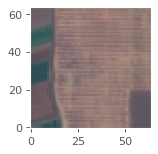

In [21]:
draw_image_with_idx(tmp)

In [22]:
#######K_Means clusters#########

In [23]:
def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

In [24]:
pic = io_img[tmp]
reshape = pic.reshape((pic.shape[0] * pic.shape[1], 3))
reshape.shape

(4096, 3)

In [25]:
cluster = KMeans(n_clusters=5).fit(reshape)
cluster

KMeans(n_clusters=5)

[57.53164557 85.2278481  88.29113924] 5.79%
[133.81748466 111.01226994 109.54754601] 16.06%
[100.68370987  90.55172414  96.82401902] 20.58%
[155.77220077 129.21138996 122.3976834 ] 25.29%
[145.84135338 120.6556391  116.17518797] 32.28%


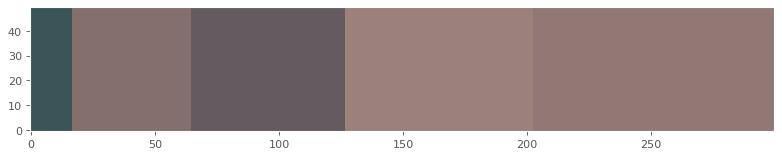

In [26]:
visualize = visualize_colors(cluster, cluster.cluster_centers_)
plt.figure(figsize=[12,4])
plt.imshow(visualize)
plt.show()

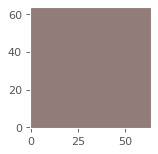

In [27]:
# А теперь посмотрим, какой у нас получился доминантный цвет при сжатии картинки до 1 пикселя
# Похоже на правду. Пока будем использовать его
pic = io_img[tmp]
dc = get_dominant_color(pic)
ppx = np.zeros_like(pic)
ppx[:,:,0] = dc[0]
ppx[:,:,1] = dc[1]
ppx[:,:,2] = dc[2]
plt.imshow(ppx)
plt.show()

In [28]:
## End #### K-Mean Clusters#####

In [29]:
#######MY_DATASETS##############

### My Dataset  (пробуем сами что-то сделать и посчитаь)

In [30]:
len(files)

27000

In [31]:
len(io_img)

27000

In [323]:
# Приключение на 1 час - уже сохранено в файл. Не нужно выполнять.
df_stat = pd.DataFrame(columns = ['id','class','z_max', 'z_min', 'z_mm_dst','r_sum', 'r_max', 'r_min', 'r_mm_dst', 'r_median', 'g_sum', 'g_max', 'g_min', 'g_mm_dst', 'g_median', 'b_sum', 'b_max', 'b_min', 'b_mm_dst', 'b_median', 'lum_max', 'lum_min', 'lum_dst', 'dom_r', 'dom_g', 'dom_b'])

i=0
for img in io_img:
    c_id = i
    c_class = yLabels[i]
    c_z_max = find_max(img)
    c_z_min = find_min(img)
    c_z_mm_dst = get_multy_distance(img)
    
    c_r_sum, c_g_sum, c_b_sum = get_sum_channels(img)
    c_r_median, c_g_median, c_b_median = get_median_channels(img)
    
    c_r_max = find_max_px_by_channel(img, 0)
    c_g_max = find_max_px_by_channel(img, 1)
    c_b_max = find_max_px_by_channel(img, 2)
    
    c_r_min = find_min_px_by_channel(img, 0)
    c_g_min = find_min_px_by_channel(img, 1)
    c_b_min = find_min_px_by_channel(img, 2)
    
    c_r_mm_dst = get_distance_red(img)
    c_g_mm_dst = get_distance_green(img)
    c_b_mm_dst = get_distance_blue(img)
    
    c_lum_max = lum_max(img)
    c_lum_min = lum_min(img)
    c_lum_dst = lum_distance(img)
    
    c_dom_r, c_dom_g, c_dom_b = get_dominant_color(img)
    
    df_stat.loc[i] = [c_id, c_class, c_z_max, c_z_min, c_z_mm_dst, c_r_sum, c_r_max, c_r_min, c_r_mm_dst, c_r_median, c_g_sum, c_g_max, c_g_min, c_g_mm_dst, c_g_median, c_b_sum, c_b_max, c_b_min, c_b_mm_dst, c_b_median, c_lum_max, c_lum_min, c_lum_dst, c_dom_r, c_dom_g, c_dom_b]
    
    if (i % 100 == 0):
        print(i)
    i = i + 1

len(df_stat)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

27000

In [32]:
# Сохраним наш датафрейм, т.к. собиралось 1 час
#pd.DataFrame(df_stat).to_pickle("df_stat.pkl")
#(если надо сохранить)

In [33]:
df_stat = pd.read_pickle("df_stat.pkl")
len(df_stat)

27000

In [34]:
# Посмотрим на полученные данные
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 0 to 26999
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        27000 non-null  float64
 1   class     27000 non-null  float64
 2   z_max     27000 non-null  float64
 3   z_min     27000 non-null  float64
 4   z_mm_dst  27000 non-null  float64
 5   r_sum     27000 non-null  float64
 6   r_max     27000 non-null  float64
 7   r_min     27000 non-null  float64
 8   r_mm_dst  27000 non-null  float64
 9   r_median  27000 non-null  float64
 10  g_sum     27000 non-null  float64
 11  g_max     27000 non-null  float64
 12  g_min     27000 non-null  float64
 13  g_mm_dst  27000 non-null  float64
 14  g_median  27000 non-null  float64
 15  b_sum     27000 non-null  float64
 16  b_max     27000 non-null  float64
 17  b_min     27000 non-null  float64
 18  b_mm_dst  27000 non-null  float64
 19  b_median  27000 non-null  float64
 20  lum_max   27000 non-null  fl

In [35]:
df_stat.head()

,id,class,z_max,z_min,z_mm_dst,r_sum,r_max,r_min,r_mm_dst,r_median,...,b_max,b_min,b_mm_dst,b_median,lum_max,lum_min,lum_dst,dom_r,dom_g,dom_b
0,0.0,0.0,515.0,264.0,40.816663,446883.0,211.0,81.0,42.190046,105.0,...,152.0,92.0,43.416587,104.0,167.5590,86.4950,59.135438,116.0,100.0,103.0
1,1.0,0.0,521.0,166.0,46.173586,410541.0,219.0,35.0,48.270074,56.0,...,144.0,65.0,35.355339,86.0,175.4050,56.6878,45.099889,55.0,98.0,81.0
2,2.0,0.0,578.0,247.0,62.393910,731426.0,221.0,61.0,63.324561,192.0,...,178.0,94.0,62.201286,148.0,190.4290,84.2534,67.082039,184.0,149.0,143.0
3,3.0,0.0,641.0,217.0,39.849718,628144.0,247.0,50.0,39.849718,184.0,...,188.0,86.0,39.849718,145.0,213.4170,74.7704,39.849718,192.0,160.0,147.0
4,4.0,0.0,496.0,217.0,28.460499,480218.0,187.0,49.0,15.524175,132.0,...,154.0,88.0,19.416488,127.0,164.1586,71.5554,18.973666,68.0,86.0,96.0


In [36]:
# Не очень хорошо получилось, сконвертим в целые числа
df_stat = df_stat.convert_dtypes()
df_stat.head()

,id,class,z_max,z_min,z_mm_dst,r_sum,r_max,r_min,r_mm_dst,r_median,...,b_max,b_min,b_mm_dst,b_median,lum_max,lum_min,lum_dst,dom_r,dom_g,dom_b
0,0,0,515,264,40.816663,446883,211,81,42.190046,105.0,...,152,92,43.416587,104.0,167.559,86.495,59.135438,116,100,103
1,1,0,521,166,46.173586,410541,219,35,48.270074,56.0,...,144,65,35.355339,86.0,175.405,56.6878,45.099889,55,98,81
2,2,0,578,247,62.39391,731426,221,61,63.324561,192.0,...,178,94,62.201286,148.0,190.429,84.2534,67.082039,184,149,143
3,3,0,641,217,39.849718,628144,247,50,39.849718,184.0,...,188,86,39.849718,145.0,213.417,74.7704,39.849718,192,160,147
4,4,0,496,217,28.460499,480218,187,49,15.524175,132.0,...,154,88,19.416488,127.0,164.1586,71.5554,18.973666,68,86,96


In [37]:
df_stat.corr()

,id,class,z_max,z_min,z_mm_dst,r_sum,r_max,r_min,r_mm_dst,r_median,...,b_max,b_min,b_mm_dst,b_median,lum_max,lum_min,lum_dst,dom_r,dom_g,dom_b
id,1.000000,0.994057,0.010814,-0.070130,0.005768,-0.207105,-0.070223,-0.126627,-0.013062,-0.213522,...,0.096677,0.022901,-0.008800,-0.055327,0.009125,-0.093646,0.018842,-0.178533,-0.125607,-0.041969
class,0.994057,1.000000,0.010175,-0.063797,0.005881,-0.203034,-0.068277,-0.121483,-0.013656,-0.208538,...,0.093525,0.026802,-0.009529,-0.053574,0.008617,-0.086348,0.018667,-0.176647,-0.124678,-0.043771
z_max,0.010814,0.010175,1.000000,0.322553,-0.017135,0.698279,0.975150,0.345116,0.017757,0.636506,...,0.977668,0.189338,-0.011449,0.640453,0.999054,0.325677,-0.027571,0.594685,0.591182,0.579372
z_min,-0.070130,-0.063797,0.322553,1.000000,0.027775,0.704492,0.351073,0.949906,0.054887,0.703990,...,0.277805,0.893556,0.042974,0.772729,0.323730,0.988886,0.026719,0.576078,0.584396,0.571123
z_mm_dst,0.005768,0.005881,-0.017135,0.027775,1.000000,0.010577,-0.009183,0.016870,0.506583,0.010372,...,-0.024583,0.038505,0.481010,0.008479,-0.016764,0.032440,0.753399,0.012524,0.011915,0.006049
r_sum,-0.207105,-0.203034,0.698279,0.704492,0.010577,1.000000,0.744266,0.757232,0.063176,0.984802,...,0.616383,0.480433,0.030063,0.885325,0.701501,0.715535,0.004754,0.849307,0.789437,0.718158
r_max,-0.070223,-0.068277,0.975150,0.351073,-0.009183,0.744266,1.000000,0.389714,0.027655,0.683631,...,0.912456,0.185250,-0.007234,0.632064,0.973578,0.360950,-0.020221,0.624666,0.599650,0.558611
r_min,-0.126627,-0.121483,0.345116,0.949906,0.016870,0.757232,0.389714,1.000000,0.052076,0.754469,...,0.279137,0.749368,0.036687,0.724252,0.348558,0.942893,0.016526,0.618646,0.587144,0.534554
r_mm_dst,-0.013062,-0.013656,0.017757,0.054887,0.506583,0.063176,0.027655,0.052076,1.000000,0.062914,...,0.007287,0.045092,0.336461,0.051944,0.018479,0.060715,0.439020,0.052024,0.049178,0.036850
r_median,-0.213522,-0.208538,0.636506,0.703990,0.010372,0.984802,0.683631,0.754469,0.062914,1.000000,...,0.555421,0.482684,0.031182,0.885885,0.640008,0.716183,0.005869,0.841654,0.773072,0.697977


In [38]:
# Как и ожидалось, параметры сильно коррелируют между собой

In [42]:
## End #### MY_DATASETS#####

In [43]:
####### ML ################

## ML

In [39]:
def quality_report(prediction, actual, verbose=True):
    acc_s = metrics.accuracy_score(actual, prediction)
    f1 = metrics.f1_score(actual, prediction, average='macro')
    pre = metrics.precision_score(actual, prediction, average='macro')
    rec = metrics.recall_score(actual, prediction, average='macro')


    quality_list = [acc_s, f1, pre, rec]
    
    if verbose:
        report_str = "Accuracy: \t {:.3f}\n" +\
                "F1-Score: \t {:.3f}\n" +\
                "Precision: \t {:.3f}\n" +\
                "Recall: \t {:.3f}\n"
        print("\n=== Quality Report ===")
        print(report_str.format(acc_s, f1, pre, rec))
        print("======================\n")
    
    return quality_list

In [40]:
def class_report(prediction, actual, verbose=True):
    sk_report = metrics.classification_report(
    digits=3,
    y_true=prediction, 
    y_pred=actual)
    
    if verbose:
        print(sk_report)
        
    return sk_report

In [41]:
df_quality = pd.DataFrame(
    columns=["ACC", "F1", "PRE", "REC"]
)

In [42]:
# yLabels and io_img are arrays of integers
x = np.array(raw_images)
y = np.array(yLabels)

Попробуем разбить наши подготовленные данные на тестовые и валидационные:

In [43]:
#For coloured
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = yLabels, train_size = 0.4, random_state=42)

print(X_train.shape)
print(X_test.shape)

(10800, 64, 64, 3)
(16200, 64, 64, 3)


In [44]:
# GreyScale our images
X_train_gs = np.zeros([X_train.shape[0], X_train.shape[1], X_train.shape[2]])
X_test_gs = np.zeros([X_test.shape[0], X_test.shape[1], X_test.shape[2]])

for i in range(X_train.shape[0]):
    X_train_gs[i] = rgb2gray(X_train[i])
    
for i in range(X_test.shape[0]):
    X_test_gs[i] = rgb2gray(X_test[i])

print(X_train_gs.shape)
print(X_test_gs.shape)


(10800, 64, 64)
(16200, 64, 64)


b'AnnualCrop'


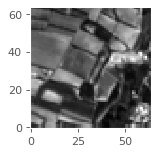

In [45]:
# Посмотрим, что у нас получилось
tmp2 = 15
img = X_train_gs[tmp2]

print(label_names[yLabels[tmp2]])

plt.imshow(img, cmap='gray'); # Без cmap передаём привет монохромным мониторам

In [46]:
print(X_train[1][0,0])
print(X_train_gs[1][0,0])

[0.31764706 0.36862745 0.54117647]
0.37023490196078435


Выглядит неплохо. Замечаем, что при переводе из цветного изображения в черно-белое у нас значения пикселя поменялись с int на float. Но это даже хорошо.



b'SeaLake'


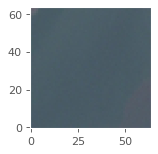

In [47]:
#Посмотрим, что не растеряли лейблы
tmp2 = 8000
img = X_train[tmp2]

print(label_names[y_train[tmp2]])
#plt.imshow(img);
plt.imshow(img, cmap='gray');

In [48]:
#Переводим наши данные в 2D-array
X_train_cl = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_test_cl = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])

X_train_gs = X_train_gs.reshape(X_train_gs.shape[0], X_train_gs.shape[1] * X_train_gs.shape[2])
X_test_gs = X_test_gs.reshape(X_test_gs.shape[0],X_test_gs.shape[1] * X_test_gs.shape[2])
print(X_train_cl.shape)
print(X_test_cl.shape)

(10800, 12288)
(16200, 12288)


10800 - количество наших картинок в выборке
12288 - это 64x64x3 - размер наших изображений в RGB
4096 = 64x64 (это размер наших изображений)

#### Обучаем дерево решений для черно-белых изображений

In [108]:
# инициализируем модель
clf = tree.DecisionTreeClassifier(random_state = 42)

# обучаем ее на тренировочных данных
clf = clf.fit(X_train_gs, y_train)

# делаем предсказание для тестовых данных
y_pred_gs = clf.predict(X_test_gs)

print(metrics.accuracy_score(y_test, y_pred_gs))
quality_report(y_pred_gs, y_test);
#class_report(y_pred_gs, y_test);

0.35462962962962963

=== Quality Report ===
Accuracy: 	 0.355
F1-Score: 	 0.343
Precision: 	 0.345
Recall: 	 0.345




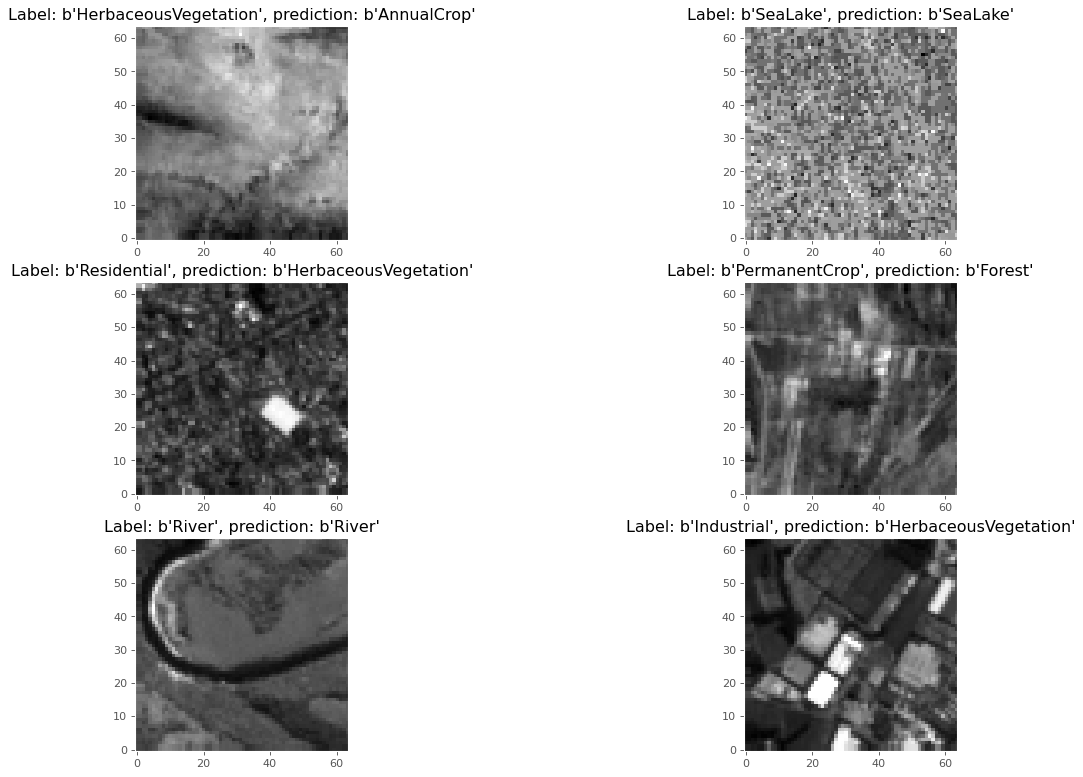

In [109]:
plt.figure(figsize=[18,12])
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.title("Label: "+str(label_names[y_test[i]])+", prediction: "+str(label_names[y_pred_gs[i]])) 
    plt.imshow(X_test_gs[i].reshape([64,64]),cmap='gray');

#### Обучим для цветных изображений

In [110]:
# инициализируем модель
clf = tree.DecisionTreeClassifier(random_state = 42)

# обучаем ее на тренировочных данных
clf = clf.fit(X_train_cl, y_train)

# делаем предсказание для тестовых данных
y_pred_cl = clf.predict(X_test_cl)

print(metrics.accuracy_score(y_test, y_pred_cl))
quality_report(y_pred_cl, y_test);
class_report(y_pred_cl, y_test);

0.43320987654320986

=== Quality Report ===
Accuracy: 	 0.433
F1-Score: 	 0.422
Precision: 	 0.422
Recall: 	 0.424


              precision    recall  f1-score   support

           0      0.425     0.390     0.406      1964
           1      0.738     0.700     0.718      1897
           2      0.347     0.336     0.341      1855
           3      0.175     0.186     0.180      1405
           4      0.459     0.550     0.500      1250
           5      0.438     0.441     0.439      1191
           6      0.244     0.243     0.244      1504
           7      0.313     0.335     0.324      1679
           8      0.324     0.349     0.336      1394
           9      0.784     0.685     0.731      2061

    accuracy                          0.433     16200
   macro avg      0.424     0.422     0.422     16200
weighted avg      0.443     0.433     0.437     16200



In [114]:
confusion = metrics.confusion_matrix(y_test, y_pred_cl)
confusion.shape

(10, 10)

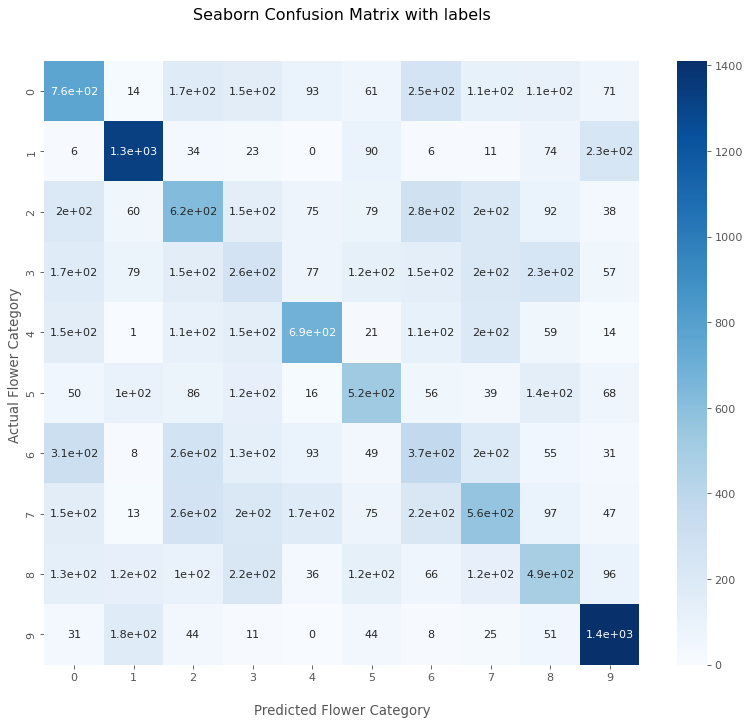

In [119]:
plt.figure(figsize=[12,10])
ax = sb.heatmap(confusion, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
#ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [195]:
print(label_Dict)

{0: b'AnnualCrop', 1: b'Forest', 2: b'HerbaceousVegetation', 3: b'Highway', 4: b'Industrial', 5: b'Pasture', 6: b'PermanentCrop', 7: b'Residential', 8: b'River', 9: b'SeaLake'}


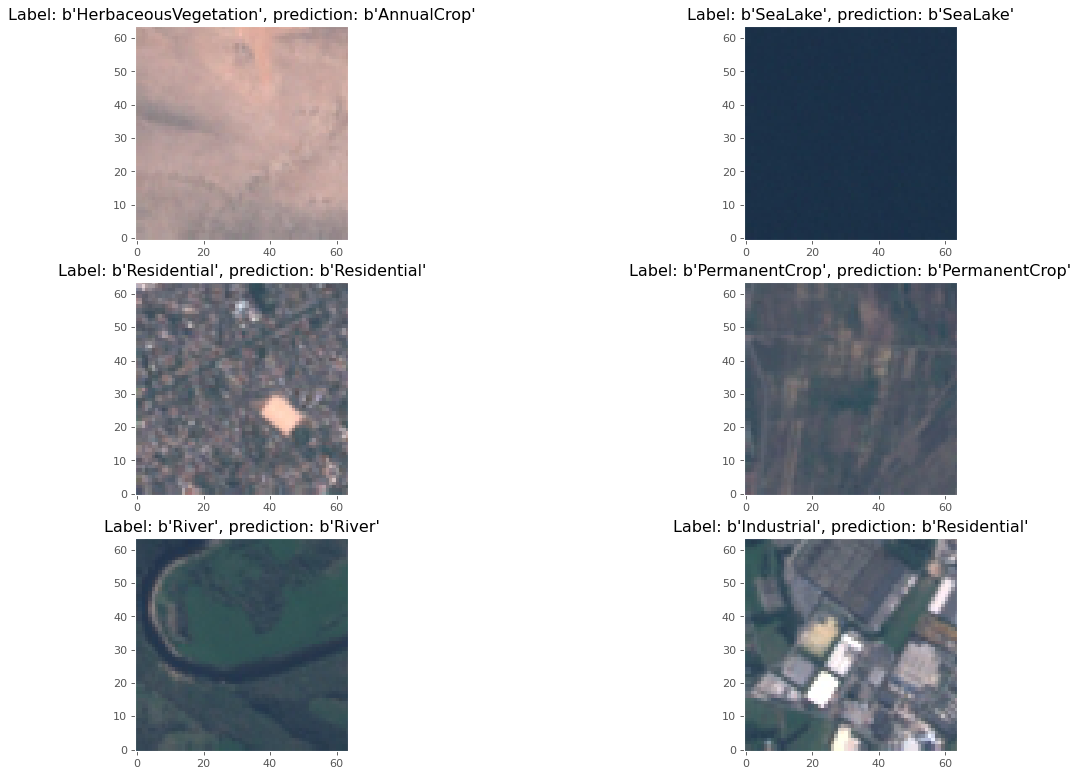

In [191]:
# Посмотрим на несколько картинок
fig=plt.figure(figsize=[18,12])
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.title("Label: "+str(label_names[y_test[i]])+", prediction: "+str(label_names[y_pred_cl[i]])) 
    plt.imshow(X_test[i].reshape([64,64,3]),cmap='gray');

#### Попытаемся найти лучшие параметры для нашего дерева

<function matplotlib.pyplot.show(close=None, block=None)>

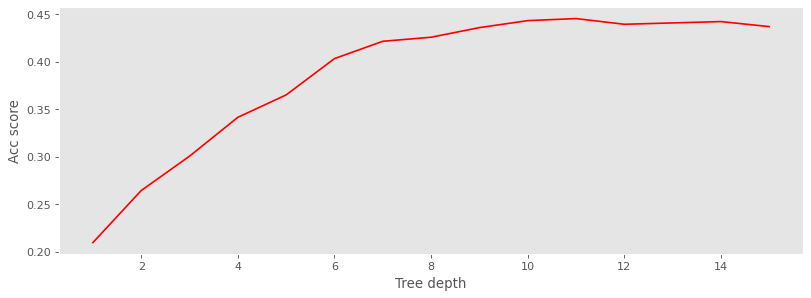

In [575]:
max_depths = np.linspace(1, 15, 15, endpoint=True)
results = []
for max_depth in max_depths:
    mdl = tree.DecisionTreeClassifier(max_depth=max_depth)
    mdl.fit(X_train_cl, y_train)
    test_pred = mdl.predict(X_test_cl)
    acc_s = metrics.accuracy_score(y_test, test_pred)
    results.append(acc_s)


plt.figure(figsize=[12,4])
plt.plot(max_depths, results, 'r', label='Test accuracy score')
plt.ylabel('Acc score')
plt.xlabel('Tree depth')
plt.show

Опытным путём было определено, что лучший max_depth = 11.Посчитаем с ним черно-белую модель:

In [123]:
# c 11 для Ч/Б
# инициализируем модель
clf = tree.DecisionTreeClassifier(max_depth=11, criterion='entropy', random_state=42)

# обучаем ее на тренировочных данных
clf = clf.fit(X_train_gs, y_train)

# делаем предсказание для тестовых данных
y_pred_gs = clf.predict(X_test_gs)

print(metrics.accuracy_score(y_test, y_pred_gs))
ql_decision_tree_gs = quality_report(y_pred_gs, y_test);
df_quality.loc["decision_tree_gs_11_entropy", :] = ql_decision_tree_gs
class_report(y_pred_gs, y_test);

0.3639506172839506

=== Quality Report ===
Accuracy: 	 0.364
F1-Score: 	 0.348
Precision: 	 0.352
Recall: 	 0.357


              precision    recall  f1-score   support

           0      0.484     0.323     0.388      2693
           1      0.756     0.637     0.691      2134
           2      0.136     0.154     0.144      1585
           3      0.134     0.230     0.169       873
           4      0.352     0.476     0.405      1110
           5      0.412     0.286     0.338      1731
           6      0.166     0.198     0.181      1258
           7      0.293     0.271     0.281      1945
           8      0.277     0.368     0.316      1129
           9      0.558     0.577     0.567      1742

    accuracy                          0.364     16200
   macro avg      0.357     0.352     0.348     16200
weighted avg      0.396     0.364     0.373     16200



In [124]:
df_quality.head()

,ACC,F1,PRE,REC
decision_tree_gs_11_entropy,0.363951,0.348101,0.352083,0.356794


In [126]:
# c 11 для цветного изображения
# инициализируем модель
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=42)

# обучаем ее на тренировочных данных
clf = clf.fit(X_train_cl, y_train)

# делаем предсказание для тестовых данных
y_pred_cl = clf.predict(X_test_cl)

print(metrics.accuracy_score(y_test, y_pred_cl))
ql_decision_tree_cl = quality_report(y_pred_cl, y_test);
df_quality.loc["decision_tree_cl_11_entropy", :] = ql_decision_tree_cl
class_report(y_pred_cl, y_test);

0.44160493827160496

=== Quality Report ===
Accuracy: 	 0.442
F1-Score: 	 0.430
Precision: 	 0.431
Recall: 	 0.433


              precision    recall  f1-score   support

           0      0.353     0.426     0.386      1489
           1      0.770     0.733     0.751      1890
           2      0.336     0.330     0.333      1833
           3      0.148     0.219     0.177      1015
           4      0.409     0.494     0.448      1243
           5      0.448     0.479     0.463      1122
           6      0.317     0.256     0.283      1859
           7      0.378     0.314     0.343      2169
           8      0.365     0.362     0.364      1513
           9      0.807     0.702     0.751      2067

    accuracy                          0.442     16200
   macro avg      0.433     0.431     0.430     16200
weighted avg      0.456     0.442     0.446     16200



C criterion='entropy' получается наилучший результат, поэтому оставим его.

<function matplotlib.pyplot.show(close=None, block=None)>

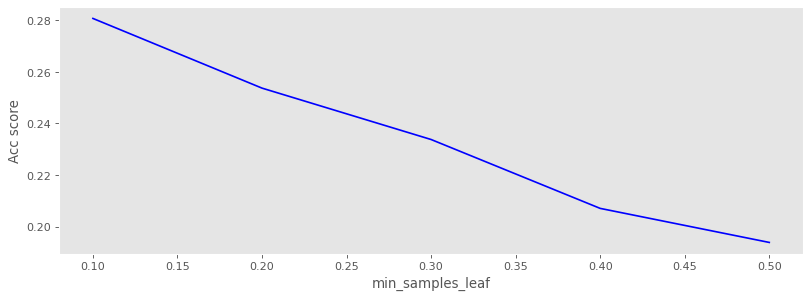

In [574]:
#Аналогично можно поиграться с min_samples_leaf

#min_leafs = np.linspace(0.1, 2, 20, endpoint=True) так не сработает
min_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
test_results = []
for min_spl in min_leafs:
    dt = tree.DecisionTreeClassifier(min_samples_leaf=min_spl, random_state=42, max_depth=11)
    dt.fit(X_train_cl, y_train)
    
    test_pred = dt.predict(X_test_cl)
    acc_s = metrics.accuracy_score(y_test, test_pred)
    test_results.append(acc_s)
    
    
plt.figure(figsize=[12,4])
plt.plot(min_leafs, test_results, 'b', label='Test min_samples_leaf')
plt.ylabel('Acc score')
plt.xlabel('min_samples_leaf')
plt.show

Похоже, тут лучше уже ничего не менять и переходить дальше.

#### Бэггинг - Попробуем улучшить наш результат.

In [138]:
# Bagging with greyscale set
#!!! Be aware of high memory usage (about 13Gb) and 10 processor cores!!!
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=42)
bag_model=BaggingClassifier(base_estimator=clf, n_estimators=80, max_samples=1.0, bootstrap=True, n_jobs=10)
bag_model=bag_model.fit(X_train_gs, y_train)
y_pred_bag_gs = bag_model.predict(X_test_gs)

print(metrics.accuracy_score(y_test, y_pred_bag_gs))
ql_bagging_tree_80_gs = quality_report(y_pred_bag_gs, y_test);
df_quality.loc["bagging_80_tree_gs_11_entropy", :] = ql_bagging_tree_80_gs
class_report(y_pred_bag_gs, y_test);

0.495679012345679

=== Quality Report ===
Accuracy: 	 0.496
F1-Score: 	 0.466
Precision: 	 0.483
Recall: 	 0.489


              precision    recall  f1-score   support

           0      0.669     0.411     0.510      2926
           1      0.896     0.640     0.747      2517
           2      0.132     0.267     0.176       886
           3      0.205     0.454     0.282       676
           4      0.722     0.665     0.692      1629
           5      0.494     0.415     0.451      1430
           6      0.147     0.292     0.195       753
           7      0.602     0.421     0.495      2573
           8      0.506     0.457     0.480      1660
           9      0.518     0.810     0.632      1150

    accuracy                          0.496     16200
   macro avg      0.489     0.483     0.466     16200
weighted avg      0.583     0.496     0.521     16200



In [ ]:
Уже лучше, попробуем на цветном:

In [137]:
# Bagging with colored set
#!!! Be aware of high memory usage (about 13Gb) and 10 processor cores!!!
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=42)
bag_model=BaggingClassifier(base_estimator=clf, n_estimators=80, max_samples=1.0, bootstrap=True, n_jobs=10)
bag_model=bag_model.fit(X_train_cl, y_train)
y_pred_bag_cl = bag_model.predict(X_test_cl)

print(metrics.accuracy_score(y_test, y_pred_bag_cl))
ql_decision_tree_80_cl = quality_report(y_pred_bag_cl, y_test);
df_quality.loc["bagging_80_tree_cl_11_entropy", :] = ql_decision_tree_80_cl
class_report(y_pred_bag_cl, y_test);

0.6411728395061729

=== Quality Report ===
Accuracy: 	 0.641
F1-Score: 	 0.626
Precision: 	 0.633
Recall: 	 0.636


              precision    recall  f1-score   support

           0      0.662     0.605     0.633      1969
           1      0.896     0.793     0.841      2034
           2      0.467     0.576     0.516      1459
           3      0.233     0.525     0.323       667
           4      0.822     0.691     0.751      1785
           5      0.744     0.693     0.718      1289
           6      0.375     0.432     0.401      1302
           7      0.679     0.498     0.574      2458
           8      0.625     0.600     0.612      1564
           9      0.857     0.922     0.888      1673

    accuracy                          0.641     16200
   macro avg      0.636     0.633     0.626     16200
weighted avg      0.677     0.641     0.652     16200



Пока это успех (acc = 0.641; минимальный precision по классу = 0.233 ) 

### Теперь попробуем CVM

Сначала на Ч/Б:

Нет, видимо не попробуем, т.к. с параметрами
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
считается более 6 часов.

In [ ]:
param_grid={'C':[0.1,1],'gamma':[1],'kernel':['poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid, verbose=3, n_jobs=5)

model.fit(X_train_gs,y_train)

# Display parameters selected by GridSearchCV for SVM 3 classes
print("Best parameters to apply are:",model.best_params_)
# Display model after hyperparameter tuning
svm = model.best_estimator_
print("Model after tuning is:\n",svm)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [139]:
df_quality.head()

,ACC,F1,PRE,REC
bagging_tree_gs_11_entropy,0.430494,0.414993,0.417352,0.424789
bagging_10_tree_cl_11_entropy,0.641173,0.625718,0.633375,0.636117
bagging_80_tree_gs_11_entropy,0.495679,0.466101,0.483381,0.488906


### Попробуем применить Random Forest

In [174]:
# RandomForest with greyscale set

rfc = RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=8, random_state=42)
rfc.fit(X_train_gs, y_train)
y_pred_rf_gs = rfc.predict(X_test_gs)

print(metrics.accuracy_score(y_test, y_pred_rf_gs))
ql_rf_500_gs = quality_report(y_pred_rf_gs, y_test);
df_quality.loc["random_forest_500_20_gs", :] = ql_rf_500_gs
class_report(y_pred_rf_gs, y_test);

0.5651234567901234

=== Quality Report ===
Accuracy: 	 0.565
F1-Score: 	 0.539
Precision: 	 0.552
Recall: 	 0.556


              precision    recall  f1-score   support

           0      0.693     0.460     0.553      2711
           1      0.896     0.763     0.824      2113
           2      0.209     0.355     0.263      1062
           3      0.223     0.511     0.311       655
           4      0.819     0.730     0.772      1684
           5      0.503     0.490     0.497      1232
           6      0.217     0.360     0.270       903
           7      0.636     0.454     0.530      2520
           8      0.556     0.478     0.514      1744
           9      0.804     0.918     0.857      1576

    accuracy                          0.565     16200
   macro avg      0.556     0.552     0.539     16200
weighted avg      0.628     0.565     0.584     16200



In [171]:
# RandomForest with color set

rfc = RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=8, random_state=42)
rfc.fit(X_train_cl, y_train)
y_pred_rf_cl = rfc.predict(X_test_cl)

print(metrics.accuracy_score(y_test, y_pred_rf_cl))
ql_rf_100_cl = quality_report(y_pred_rf_cl, y_test);
df_quality.loc["random_forest_500_10_cl", :] = ql_rf_100_cl
class_report(y_pred_rf_cl, y_test);

0.669320987654321

=== Quality Report ===
Accuracy: 	 0.669
F1-Score: 	 0.653
Precision: 	 0.659
Recall: 	 0.664


              precision    recall  f1-score   support

           0      0.696     0.624     0.658      2007
           1      0.905     0.814     0.857      2001
           2      0.523     0.626     0.570      1503
           3      0.245     0.537     0.336       683
           4      0.877     0.727     0.795      1810
           5      0.759     0.698     0.727      1306
           6      0.406     0.492     0.445      1237
           7      0.692     0.530     0.600      2352
           8      0.646     0.616     0.631      1573
           9      0.891     0.928     0.909      1728

    accuracy                          0.669     16200
   macro avg      0.664     0.659     0.653     16200
weighted avg      0.705     0.669     0.681     16200



Попробуем посмотреть на max_depth

<function matplotlib.pyplot.show(close=None, block=None)>

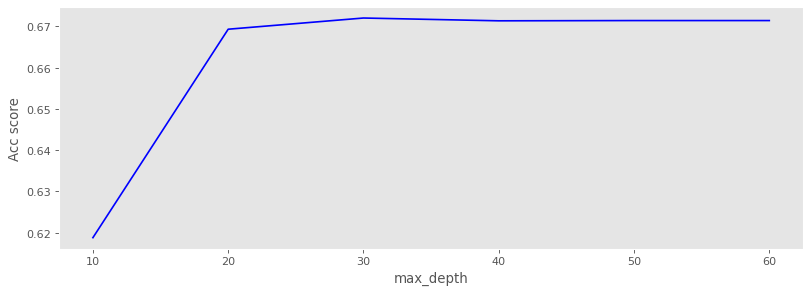

In [173]:
#Попробуем посмотреть на max_depth для RandomForest

max_depth = np.linspace(10, 60, 6, endpoint=True)
results = []
for md in max_depth:
    rf = RandomForestClassifier(n_estimators=500, max_depth=md, n_jobs=8, random_state=42)
    rf.fit(X_train_cl, y_train)
    test_pred = rf.predict(X_test_cl)
    acc_s = metrics.accuracy_score(y_test, test_pred)
    results.append(acc_s)
    
    
plt.figure(figsize=[12,4])
plt.plot(max_depth, results, 'b', label='Test RF with max_depth')
plt.ylabel('Acc score')
plt.xlabel('max_depth')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

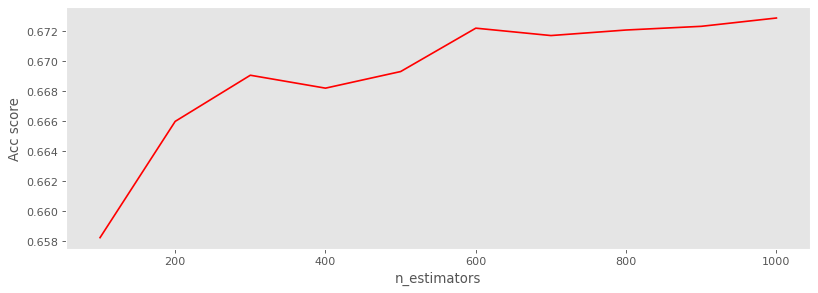

In [180]:
#Попробуем посмотреть на n_estimators для RandomForest

estimators = np.linspace(100, 1000, 10, endpoint=True).astype(int)
results = []
for esti in estimators:
    rf = RandomForestClassifier(n_estimators=esti, max_depth=20, n_jobs=8, random_state=42)
    rf.fit(X_train_cl, y_train)
    test_pred = rf.predict(X_test_cl)
    acc_s = metrics.accuracy_score(y_test, test_pred)
    results.append(acc_s)
    
    
plt.figure(figsize=[12,4])
plt.plot(estimators, results, 'r', label='Test RF with n_estimators')
plt.ylabel('Acc score')
plt.xlabel('n_estimators')
plt.show

Попробуем рассчитать для значения 600

In [181]:
# RandomForest with color set with n_estimators=500

rfc = RandomForestClassifier(n_estimators=600, max_depth=20, n_jobs=8, random_state=42)
rfc.fit(X_train_cl, y_train)
y_pred_rf_600_cl = rfc.predict(X_test_cl)

print(metrics.accuracy_score(y_test, y_pred_rf_600_cl))
ql_rf_600_cl = quality_report(y_pred_rf_600_cl, y_test);
df_quality.loc["random_forest_600_10_cl", :] = ql_rf_600_cl
class_report(y_pred_rf_600_cl, y_test);

0.6722222222222223

=== Quality Report ===
Accuracy: 	 0.672
F1-Score: 	 0.656
Precision: 	 0.662
Recall: 	 0.667


              precision    recall  f1-score   support

           0      0.703     0.628     0.664      2013
           1      0.908     0.815     0.859      2004
           2      0.527     0.635     0.576      1494
           3      0.256     0.549     0.349       700
           4      0.879     0.727     0.796      1813
           5      0.758     0.698     0.727      1304
           6      0.401     0.486     0.440      1239
           7      0.693     0.534     0.604      2335
           8      0.651     0.622     0.636      1571
           9      0.891     0.929     0.910      1727

    accuracy                          0.672     16200
   macro avg      0.667     0.662     0.656     16200
weighted avg      0.707     0.672     0.684     16200



acc = 0.67 Пока это рекорд. Но точно ли всё так хорошо?

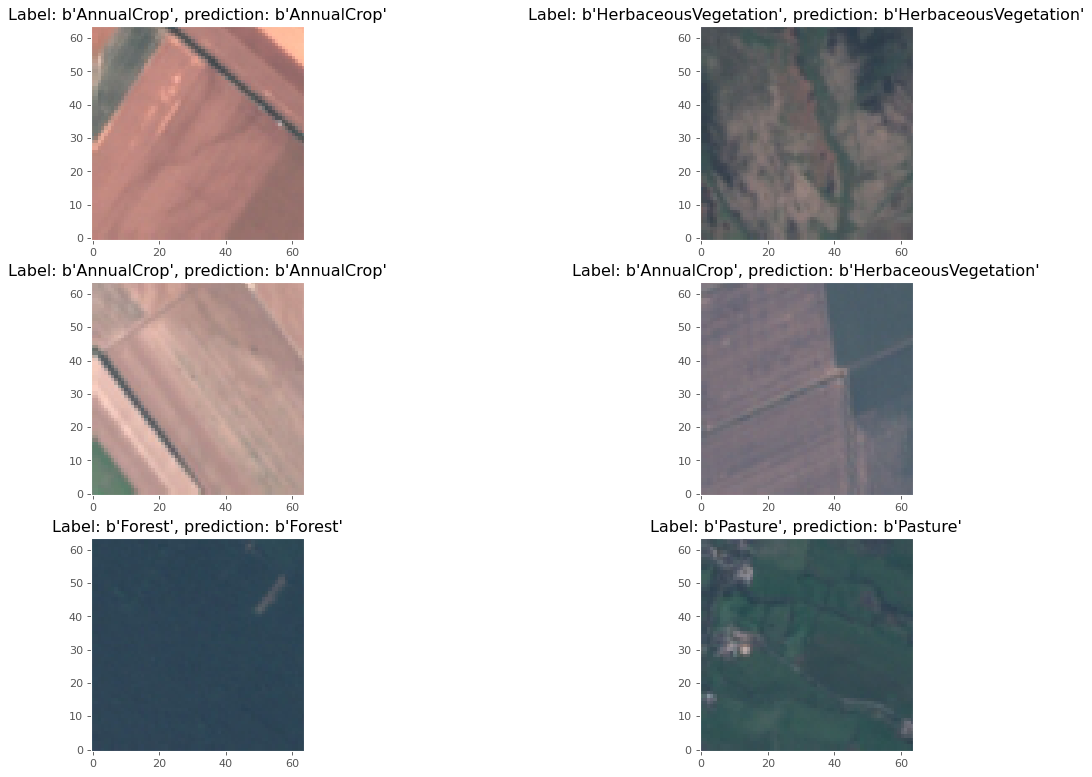

In [209]:
# Посмотрим на несколько картинок
plt.figure(figsize=[18,12])
j = 0
for i in range(11100, 11106):
    plt.subplot(3,2,j+1)
    plt.title("Label: "+str(label_names[y_test[i]])+", prediction: "+str(label_names[y_pred_rf_600_cl[i]])) 
    plt.imshow(X_test[i].reshape([64,64,3]),cmap='gray');
    j = j+1

In [196]:
pprint.pprint(label_Dict)

{0: b'AnnualCrop',
 1: b'Forest',
 2: b'HerbaceousVegetation',
 3: b'Highway',
 4: b'Industrial',
 5: b'Pasture',
 6: b'PermanentCrop',
 7: b'Residential',
 8: b'River',
 9: b'SeaLake'}


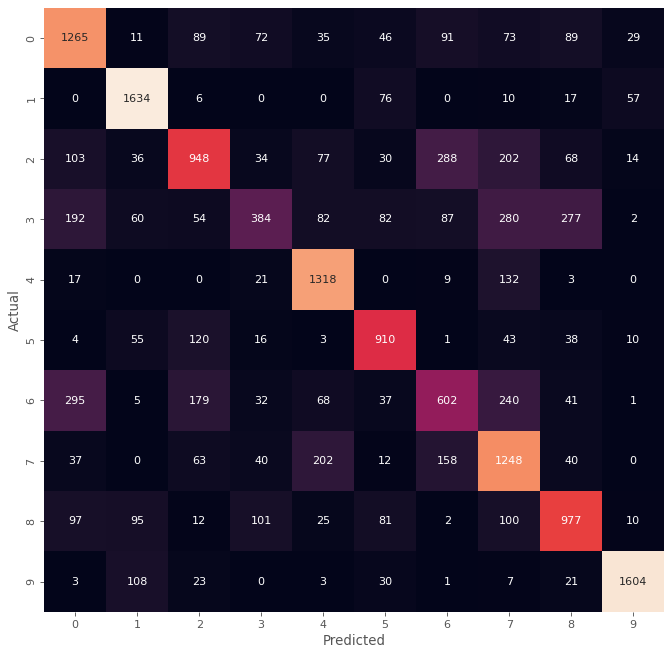

In [211]:
cm = pd.crosstab(y_test, y_pred_rf_600_cl, rownames=['Actual'], colnames=['Predicted'])
p = plt.figure(figsize=(10,10));
p = sb.heatmap(cm, annot=True, fmt="d", cbar=False)

#### Попробуем сделать GridSearch для RandomForest

In [219]:
# RandomForest with color set with n_estimators=500 and entropy
params = {'n_estimators': [300, 600], 'max_features': [None, 3], 'max_depth': [20]}

rfc = RandomForestClassifier(random_state=42)
gcv = GridSearchCV(rfc, params, scoring = 'accuracy')
gcv.fit(X_train_cl, y_train)
y_pred_rf_gcv = gcv.predict(X_test_cl)

print('Best params: ', gcv.best_params_)

KeyboardInterrupt: 

In [153]:
df_quality

,ACC,F1,PRE,REC
bagging_tree_gs_11_entropy,0.430494,0.414993,0.417352,0.424789
bagging_10_tree_cl_11_entropy,0.641173,0.625718,0.633375,0.636117
bagging_80_tree_gs_11_entropy,0.495679,0.466101,0.483381,0.488906
random_forest_100_10,0.486111,0.447419,0.490377,0.478378
random_forest_500_10,0.490185,0.448314,0.497208,0.482783
random_forest_100_10_cl,0.611605,0.592952,0.612547,0.607367
random_forest_500_10_cl,0.618765,0.599645,0.623827,0.614544


#### CatBoost

In [233]:
#CatBoost GreyScale
from catboost import CatBoostClassifier

cat = CatBoostClassifier(loss_function='MultiClass', task_type='GPU', random_state=42 )
cat.fit(X_train_gs, y_train)
y_pred_cat_gs = cat.predict(X_test_gs)

print(metrics.accuracy_score(y_test, y_pred_cat_gs))
ql_cat_gs = quality_report(y_pred_cat_gs, y_test);
df_quality.loc["cat_boost_gs", :] = ql_cat_gs
class_report(y_pred_cat_gs, y_test);

Learning rate set to 0.105463
0:	learn: 2.1941725	total: 337ms	remaining: 5m 36s
1:	learn: 2.1210267	total: 617ms	remaining: 5m 7s
2:	learn: 2.0629243	total: 889ms	remaining: 4m 55s
3:	learn: 2.0152114	total: 1.16s	remaining: 4m 48s
4:	learn: 1.9729293	total: 1.43s	remaining: 4m 43s
5:	learn: 1.9345056	total: 1.73s	remaining: 4m 46s
6:	learn: 1.9006028	total: 2.03s	remaining: 4m 48s
7:	learn: 1.8700233	total: 2.33s	remaining: 4m 48s
8:	learn: 1.8461209	total: 2.57s	remaining: 4m 42s
9:	learn: 1.8220707	total: 2.83s	remaining: 4m 40s
10:	learn: 1.7991162	total: 3.09s	remaining: 4m 38s
11:	learn: 1.7807246	total: 3.34s	remaining: 4m 34s
12:	learn: 1.7644667	total: 3.58s	remaining: 4m 31s
13:	learn: 1.7484670	total: 3.83s	remaining: 4m 29s
14:	learn: 1.7336451	total: 4.08s	remaining: 4m 27s
15:	learn: 1.7210187	total: 4.35s	remaining: 4m 27s
16:	learn: 1.7100611	total: 4.57s	remaining: 4m 24s
17:	learn: 1.7012147	total: 4.84s	remaining: 4m 24s
18:	learn: 1.6906890	total: 5.11s	remaining: 

158:	learn: 1.1549348	total: 41.6s	remaining: 3m 40s
159:	learn: 1.1534882	total: 41.9s	remaining: 3m 39s
160:	learn: 1.1512951	total: 42.2s	remaining: 3m 39s
161:	learn: 1.1501004	total: 42.4s	remaining: 3m 39s
162:	learn: 1.1481236	total: 42.7s	remaining: 3m 39s
163:	learn: 1.1445240	total: 43s	remaining: 3m 38s
164:	learn: 1.1432165	total: 43.2s	remaining: 3m 38s
165:	learn: 1.1410090	total: 43.5s	remaining: 3m 38s
166:	learn: 1.1384511	total: 43.8s	remaining: 3m 38s
167:	learn: 1.1358739	total: 44.1s	remaining: 3m 38s
168:	learn: 1.1339321	total: 44.3s	remaining: 3m 37s
169:	learn: 1.1294214	total: 44.6s	remaining: 3m 37s
170:	learn: 1.1282738	total: 44.9s	remaining: 3m 37s
171:	learn: 1.1248924	total: 45.1s	remaining: 3m 37s
172:	learn: 1.1226639	total: 45.4s	remaining: 3m 37s
173:	learn: 1.1200355	total: 45.6s	remaining: 3m 36s
174:	learn: 1.1169224	total: 45.9s	remaining: 3m 36s
175:	learn: 1.1142961	total: 46.2s	remaining: 3m 36s
176:	learn: 1.1104206	total: 46.5s	remaining: 3m

313:	learn: 0.8212587	total: 1m 24s	remaining: 3m 3s
314:	learn: 0.8206595	total: 1m 24s	remaining: 3m 3s
315:	learn: 0.8190674	total: 1m 24s	remaining: 3m 3s
316:	learn: 0.8179121	total: 1m 24s	remaining: 3m 2s
317:	learn: 0.8161901	total: 1m 25s	remaining: 3m 2s
318:	learn: 0.8131499	total: 1m 25s	remaining: 3m 2s
319:	learn: 0.8103117	total: 1m 25s	remaining: 3m 2s
320:	learn: 0.8094005	total: 1m 26s	remaining: 3m 2s
321:	learn: 0.8070301	total: 1m 26s	remaining: 3m 1s
322:	learn: 0.8060635	total: 1m 26s	remaining: 3m 1s
323:	learn: 0.8043924	total: 1m 26s	remaining: 3m 1s
324:	learn: 0.8023309	total: 1m 27s	remaining: 3m 1s
325:	learn: 0.8003354	total: 1m 27s	remaining: 3m
326:	learn: 0.7991668	total: 1m 27s	remaining: 3m
327:	learn: 0.7982254	total: 1m 28s	remaining: 3m
328:	learn: 0.7959905	total: 1m 28s	remaining: 3m
329:	learn: 0.7934407	total: 1m 28s	remaining: 2m 59s
330:	learn: 0.7916271	total: 1m 28s	remaining: 2m 59s
331:	learn: 0.7900409	total: 1m 29s	remaining: 2m 59s
33

466:	learn: 0.6005579	total: 2m 7s	remaining: 2m 25s
467:	learn: 0.6001109	total: 2m 7s	remaining: 2m 25s
468:	learn: 0.5983869	total: 2m 8s	remaining: 2m 25s
469:	learn: 0.5968808	total: 2m 8s	remaining: 2m 24s
470:	learn: 0.5954591	total: 2m 8s	remaining: 2m 24s
471:	learn: 0.5941021	total: 2m 9s	remaining: 2m 24s
472:	learn: 0.5934528	total: 2m 9s	remaining: 2m 23s
473:	learn: 0.5930197	total: 2m 9s	remaining: 2m 23s
474:	learn: 0.5919138	total: 2m 9s	remaining: 2m 23s
475:	learn: 0.5905927	total: 2m 10s	remaining: 2m 23s
476:	learn: 0.5898481	total: 2m 10s	remaining: 2m 22s
477:	learn: 0.5883021	total: 2m 10s	remaining: 2m 22s
478:	learn: 0.5867397	total: 2m 10s	remaining: 2m 22s
479:	learn: 0.5850856	total: 2m 11s	remaining: 2m 22s
480:	learn: 0.5836167	total: 2m 11s	remaining: 2m 21s
481:	learn: 0.5824803	total: 2m 11s	remaining: 2m 21s
482:	learn: 0.5808673	total: 2m 12s	remaining: 2m 21s
483:	learn: 0.5796526	total: 2m 12s	remaining: 2m 21s
484:	learn: 0.5790422	total: 2m 12s	r

619:	learn: 0.4455244	total: 2m 50s	remaining: 1m 44s
620:	learn: 0.4442487	total: 2m 50s	remaining: 1m 44s
621:	learn: 0.4433574	total: 2m 50s	remaining: 1m 43s
622:	learn: 0.4420279	total: 2m 51s	remaining: 1m 43s
623:	learn: 0.4409970	total: 2m 51s	remaining: 1m 43s
624:	learn: 0.4402126	total: 2m 51s	remaining: 1m 43s
625:	learn: 0.4394414	total: 2m 52s	remaining: 1m 42s
626:	learn: 0.4389261	total: 2m 52s	remaining: 1m 42s
627:	learn: 0.4381474	total: 2m 52s	remaining: 1m 42s
628:	learn: 0.4374684	total: 2m 52s	remaining: 1m 41s
629:	learn: 0.4364481	total: 2m 53s	remaining: 1m 41s
630:	learn: 0.4354182	total: 2m 53s	remaining: 1m 41s
631:	learn: 0.4352241	total: 2m 53s	remaining: 1m 41s
632:	learn: 0.4340157	total: 2m 54s	remaining: 1m 40s
633:	learn: 0.4333872	total: 2m 54s	remaining: 1m 40s
634:	learn: 0.4319940	total: 2m 54s	remaining: 1m 40s
635:	learn: 0.4314093	total: 2m 54s	remaining: 1m 40s
636:	learn: 0.4304848	total: 2m 55s	remaining: 1m 39s
637:	learn: 0.4295685	total:

773:	learn: 0.3381674	total: 3m 33s	remaining: 1m 2s
774:	learn: 0.3375019	total: 3m 33s	remaining: 1m 2s
775:	learn: 0.3370537	total: 3m 34s	remaining: 1m 1s
776:	learn: 0.3365436	total: 3m 34s	remaining: 1m 1s
777:	learn: 0.3363576	total: 3m 34s	remaining: 1m 1s
778:	learn: 0.3361451	total: 3m 34s	remaining: 1m
779:	learn: 0.3357429	total: 3m 35s	remaining: 1m
780:	learn: 0.3349103	total: 3m 35s	remaining: 1m
781:	learn: 0.3348126	total: 3m 35s	remaining: 1m
782:	learn: 0.3342053	total: 3m 36s	remaining: 59.9s
783:	learn: 0.3335194	total: 3m 36s	remaining: 59.6s
784:	learn: 0.3333199	total: 3m 36s	remaining: 59.3s
785:	learn: 0.3331514	total: 3m 36s	remaining: 59s
786:	learn: 0.3329904	total: 3m 37s	remaining: 58.8s
787:	learn: 0.3322123	total: 3m 37s	remaining: 58.5s
788:	learn: 0.3318333	total: 3m 37s	remaining: 58.2s
789:	learn: 0.3311292	total: 3m 37s	remaining: 57.9s
790:	learn: 0.3308149	total: 3m 38s	remaining: 57.7s
791:	learn: 0.3305518	total: 3m 38s	remaining: 57.4s
792:	le

930:	learn: 0.2625041	total: 4m 17s	remaining: 19.1s
931:	learn: 0.2623089	total: 4m 17s	remaining: 18.8s
932:	learn: 0.2619410	total: 4m 18s	remaining: 18.5s
933:	learn: 0.2618172	total: 4m 18s	remaining: 18.3s
934:	learn: 0.2611824	total: 4m 18s	remaining: 18s
935:	learn: 0.2608464	total: 4m 19s	remaining: 17.7s
936:	learn: 0.2601084	total: 4m 19s	remaining: 17.4s
937:	learn: 0.2599634	total: 4m 19s	remaining: 17.2s
938:	learn: 0.2593913	total: 4m 19s	remaining: 16.9s
939:	learn: 0.2587219	total: 4m 20s	remaining: 16.6s
940:	learn: 0.2582003	total: 4m 20s	remaining: 16.3s
941:	learn: 0.2575313	total: 4m 20s	remaining: 16.1s
942:	learn: 0.2568962	total: 4m 21s	remaining: 15.8s
943:	learn: 0.2564058	total: 4m 21s	remaining: 15.5s
944:	learn: 0.2562445	total: 4m 21s	remaining: 15.2s
945:	learn: 0.2560261	total: 4m 21s	remaining: 14.9s
946:	learn: 0.2554442	total: 4m 22s	remaining: 14.7s
947:	learn: 0.2548475	total: 4m 22s	remaining: 14.4s
948:	learn: 0.2543660	total: 4m 22s	remaining: 1

In [234]:
print(metrics.accuracy_score(y_test, y_pred_cat_gs))
ql_cat_gs = quality_report(y_pred_cat_gs, y_test);
df_quality.loc["cat_boost_gs", :] = ql_cat_gs
class_report(y_pred_cat_gs, y_test);

0.6345679012345679

=== Quality Report ===
Accuracy: 	 0.635
F1-Score: 	 0.622
Precision: 	 0.622
Recall: 	 0.626


              precision    recall  f1-score   support

           0      0.726     0.637     0.679      2052
           1      0.887     0.812     0.848      1965
           2      0.334     0.358     0.346      1677
           3      0.381     0.488     0.428      1170
           4      0.807     0.812     0.809      1491
           5      0.566     0.504     0.533      1347
           6      0.411     0.424     0.417      1456
           7      0.766     0.733     0.749      1881
           8      0.552     0.545     0.548      1520
           9      0.829     0.910     0.868      1641

    accuracy                          0.635     16200
   macro avg      0.626     0.622     0.622     16200
weighted avg      0.645     0.635     0.638     16200



In [49]:
#CatBoost Colored
from catboost import CatBoostClassifier

# Почему-то python перезагружается, если пытаться рассчитать это на CUDA (хотя ч/б работает)

cat = CatBoostClassifier(iterations=200, max_depth=3, loss_function='MultiClass', task_type='CPU', random_state=42 )
cat.fit(X_train_cl, y_train)
y_pred_cat_cl = cat.predict(X_test_cl)

print(metrics.accuracy_score(y_test, y_pred_cat_cl))
ql_cat_cl = quality_report(y_pred_cat_cl, y_test);
df_quality.loc["cat_boost_cl", :] = ql_cat_cl
class_report(y_pred_cat_cl, y_test);

Learning rate set to 0.348063
0:	learn: 2.0860839	total: 1.84s	remaining: 6m 6s
1:	learn: 1.9785433	total: 3.34s	remaining: 5m 30s
2:	learn: 1.9023712	total: 4.78s	remaining: 5m 14s
3:	learn: 1.8544634	total: 6.04s	remaining: 4m 55s
4:	learn: 1.8015930	total: 7.48s	remaining: 4m 51s
5:	learn: 1.7671659	total: 8.76s	remaining: 4m 43s
6:	learn: 1.7354495	total: 10s	remaining: 4m 36s
7:	learn: 1.7130857	total: 11.3s	remaining: 4m 30s
8:	learn: 1.6928370	total: 12.5s	remaining: 4m 25s
9:	learn: 1.6763990	total: 13.7s	remaining: 4m 21s
10:	learn: 1.6505149	total: 15.1s	remaining: 4m 19s
11:	learn: 1.6366813	total: 16.3s	remaining: 4m 15s
12:	learn: 1.6268363	total: 17.5s	remaining: 4m 11s
13:	learn: 1.6012711	total: 18.8s	remaining: 4m 9s
14:	learn: 1.5821980	total: 20.1s	remaining: 4m 7s
15:	learn: 1.5716405	total: 21.3s	remaining: 4m 5s
16:	learn: 1.5543933	total: 22.7s	remaining: 4m 3s
17:	learn: 1.5420061	total: 23.9s	remaining: 4m 1s
18:	learn: 1.5359381	total: 25.1s	remaining: 3m 58s


156:	learn: 0.8618750	total: 3m 24s	remaining: 56.1s
157:	learn: 0.8604847	total: 3m 25s	remaining: 54.8s
158:	learn: 0.8591767	total: 3m 27s	remaining: 53.5s
159:	learn: 0.8563583	total: 3m 28s	remaining: 52.2s
160:	learn: 0.8532688	total: 3m 30s	remaining: 50.9s
161:	learn: 0.8507091	total: 3m 31s	remaining: 49.6s
162:	learn: 0.8494868	total: 3m 32s	remaining: 48.3s
163:	learn: 0.8449564	total: 3m 34s	remaining: 47.1s
164:	learn: 0.8432294	total: 3m 35s	remaining: 45.7s
165:	learn: 0.8417088	total: 3m 36s	remaining: 44.4s
166:	learn: 0.8379421	total: 3m 38s	remaining: 43.1s
167:	learn: 0.8366594	total: 3m 39s	remaining: 41.8s
168:	learn: 0.8363303	total: 3m 40s	remaining: 40.5s
169:	learn: 0.8335673	total: 3m 41s	remaining: 39.2s
170:	learn: 0.8316745	total: 3m 43s	remaining: 37.9s
171:	learn: 0.8315959	total: 3m 44s	remaining: 36.5s
172:	learn: 0.8306926	total: 3m 45s	remaining: 35.2s
173:	learn: 0.8287718	total: 3m 46s	remaining: 33.9s
174:	learn: 0.8274615	total: 3m 48s	remaining:

In [50]:
print(metrics.accuracy_score(y_test, y_pred_cat_cl))
ql_cat_cl = quality_report(y_pred_cat_cl, y_test);
df_quality.loc["cat_boost_cl", :] = ql_cat_cl
class_report(y_pred_cat_cl, y_test);

0.6409259259259259

=== Quality Report ===
Accuracy: 	 0.641
F1-Score: 	 0.632
Precision: 	 0.634
Recall: 	 0.636


              precision    recall  f1-score   support

           0      0.666     0.659     0.662      1820
           1      0.862     0.778     0.818      1996
           2      0.529     0.530     0.530      1795
           3      0.315     0.489     0.383       967
           4      0.783     0.822     0.802      1428
           5      0.723     0.634     0.675      1370
           6      0.439     0.465     0.451      1415
           7      0.677     0.548     0.606      2226
           8      0.583     0.595     0.589      1469
           9      0.786     0.825     0.805      1714

    accuracy                          0.641     16200
   macro avg      0.636     0.634     0.632     16200
weighted avg      0.656     0.641     0.646     16200



In [212]:
## End ##of## ML #####

In [213]:
####### NN ################

## NN

In [1]:
from keras.models import Sequential
import tensorflow as tf

from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD, RMSprop

In [ ]:
batch_size = 16
nb_classes = 10
nb_epochs = 5
img_rows, img_columns = 64, 64
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [224]:
nnm = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
])

In [ ]:
nnm.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [214]:
## End ##of## NN #####

In [310]:
 ## Решейпинг
imgs = np.asarray(io);
reds = imgs[:,:,:,0];
reds2 = reds.reshape(*reds.shape[:-2], -1)

In [311]:
reds2.shape

(54000, 4096)